In [50]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score


In [76]:
# Load datasets
df = pd.read_csv("Surveydata_train_(2).csv")
dftest = pd.read_csv("Surveydata_test_(2).csv")
dftravel = pd.read_csv('Traveldata_train_(2).csv')
dftraveltest = pd.read_csv('Traveldata_test_(2).csv')

In [77]:
train_data = pd.merge(df, dftravel, on='ID', how='inner')
test_data = pd.merge(dftest, dftraveltest, on='ID', how='inner')

In [78]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# List of columns to impute
columns_to_impute = [
    'Seat_Comfort', 'Arrival_Time_Convenient', 'Catering', 'Platform_Location', 
    'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support', 
    'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling', 
    'CheckIn_Service', 'Cleanliness', 'Online_Boarding', 'Gender', 'Customer_Type', 
    'Age', 'Type_Travel', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins'
]

# Function to handle imputation with RandomForest
def impute_missing_values(df, column, classifier_params, regressor_params):
    non_null_data = df[df[column].notnull()]
    null_data = df[df[column].isnull()]
    
    if null_data.empty:
        return  # Skip if there are no missing values

    # Define X and y for training the imputation model
    X_train = non_null_data.drop(columns=[column])
    y_train = non_null_data[column]
    X_null = null_data.drop(columns=[column])

    # Combine data for consistent one-hot encoding
    combined_data = pd.concat([X_train, X_null], axis=0)
    combined_data = pd.get_dummies(combined_data, drop_first=True)

    # Split encoded data back into training and prediction sets
    X_train_encoded = combined_data.iloc[:len(X_train), :]
    X_null_encoded = combined_data.iloc[len(X_train):, :]
    X_null_encoded = X_null_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

    # Choose model based on data type (categorical vs. numerical)
    if df[column].dtype == 'object' or df[column].nunique() < 20:
        model = RandomForestClassifier(**classifier_params)
    else:
        model = RandomForestRegressor(**regressor_params)

    # Train the model and impute missing values
    model.fit(X_train_encoded, y_train)
    df.loc[df[column].isnull(), column] = model.predict(X_null_encoded)

# Parameters for RandomForest models
classifier_params = {
    'n_estimators': 1715,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'sqrt',
    'max_depth': 47,
    'bootstrap': False,
    'random_state': 42,
    'n_jobs': -1
}

regressor_params = classifier_params.copy()

# Loop through columns and apply imputation
for column in columns_to_impute:
    impute_missing_values(train_data, column, classifier_params, regressor_params)

print("All missing values filled.")


All missing values filled.


In [79]:
testhelp = train_data.drop(columns=["Overall_Experience"]).copy()

# Step 2: Append `testhelp` to `test_data`
test_data_extended = pd.concat([test_data, testhelp], ignore_index=True)

test_data_extended.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129981 entries, 0 to 129980
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       129981 non-null  int64  
 1   Seat_Comfort             129959 non-null  object 
 2   Seat_Class               129981 non-null  object 
 3   Arrival_Time_Convenient  126656 non-null  object 
 4   Catering                 126624 non-null  object 
 5   Platform_Location        129969 non-null  object 
 6   Onboard_Wifi_Service     129969 non-null  object 
 7   Onboard_Entertainment    129973 non-null  object 
 8   Online_Support           129955 non-null  object 
 9   Ease_of_Online_Booking   129963 non-null  object 
 10  Onboard_Service          127109 non-null  object 
 11  Legroom                  129956 non-null  object 
 12  Baggage_Handling         129941 non-null  object 
 13  CheckIn_Service          129959 non-null  object 
 14  Clea

In [80]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# List of columns to impute
columns_to_impute = [
    'Seat_Comfort', 'Arrival_Time_Convenient', 'Catering', 'Platform_Location', 
    'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support', 
    'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling', 
    'CheckIn_Service', 'Cleanliness', 'Online_Boarding', 'Gender', 'Customer_Type', 
    'Age', 'Type_Travel', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins'
]

# Define classifier and regressor parameters
model_params = {
    'n_estimators': 1715,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'sqrt',
    'max_depth': 47,
    'bootstrap': False,
    'random_state': 42,
    'n_jobs': -1
}

# Imputation function for modularity
def impute_missing_values(df, column, model_params):
    non_null_data = df[df[column].notnull()]
    null_data = df[df[column].isnull()]
    
    if null_data.empty:
        return  # Skip if no missing values

    # Define X and y for training the imputation model
    X_train = non_null_data.drop(columns=[column])
    y_train = non_null_data[column]
    X_null = null_data.drop(columns=[column])

    # Combine data for consistent encoding
    combined_data = pd.concat([X_train, X_null], axis=0)
    combined_data = pd.get_dummies(combined_data, drop_first=True)

    # Split back into train and null sets after encoding
    X_train_encoded = combined_data.iloc[:len(X_train), :]
    X_null_encoded = combined_data.iloc[len(X_train):, :]
    X_null_encoded = X_null_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

    # Choose model based on data type
    if df[column].dtype == 'object' or df[column].nunique() < 20:
        model = RandomForestClassifier(**model_params)
    else:
        model = RandomForestRegressor(**model_params)

    # Train the model and fill missing values
    model.fit(X_train_encoded, y_train)
    df.loc[df[column].isnull(), column] = model.predict(X_null_encoded)

# Loop through columns and apply imputation
for column in columns_to_impute:
    impute_missing_values(test_data_extended, column, model_params)

print("All missing values filled.")


KeyboardInterrupt: 

In [64]:
test_data_final = test_data_extended.iloc[:len(test_data)].copy()

# Check the result
print("Final test_data after imputing and removing testhelp:")
test_data_final.isnull().sum()  ,test_data_final.isnull().sum()  # Confirm no nulls remain

Final test_data after imputing and removing testhelp:


(ID                         0
 Seat_Comfort               0
 Seat_Class                 0
 Arrival_Time_Convenient    0
 Catering                   0
 Platform_Location          0
 Onboard_Wifi_Service       0
 Onboard_Entertainment      0
 Online_Support             0
 Ease_of_Online_Booking     0
 Onboard_Service            0
 Legroom                    0
 Baggage_Handling           0
 CheckIn_Service            0
 Cleanliness                0
 Online_Boarding            0
 Gender                     0
 Customer_Type              0
 Age                        0
 Type_Travel                0
 Travel_Class               0
 Travel_Distance            0
 Departure_Delay_in_Mins    0
 Arrival_Delay_in_Mins      0
 dtype: int64,
 ID                         0
 Seat_Comfort               0
 Seat_Class                 0
 Arrival_Time_Convenient    0
 Catering                   0
 Platform_Location          0
 Onboard_Wifi_Service       0
 Onboard_Entertainment      0
 Online_Support          

In [65]:
df1_sorted = test_data.sort_values(by="ID").reset_index(drop=True)
df2_sorted = test_data_final.sort_values(by="ID").reset_index(drop=True)

if df1_sorted["ID"].equals(df2_sorted["ID"]):
    print("The ID columns are exactly the same in both DataFrames.")
else:
    print("The ID columns differ between the two DataFrames.")

The ID columns are exactly the same in both DataFrames.


In [66]:
trained_data =train_data.copy()
trainedtest_data = test_data_final.copy()

In [67]:
X_train = trained_data.drop(columns=["Overall_Experience"])
y_train = trained_data["Overall_Experience"]

test_ID = trainedtest_data["ID"]
X_test = trainedtest_data.drop(columns=["ID"]) 

combined_data = pd.concat([X_train, X_test], keys=["train", "test"])
combined_data = pd.get_dummies(combined_data)

X_train_encoded = combined_data.loc["train"]
X_test_encoded = combined_data.loc["test"]

X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

In [81]:
model = RandomForestClassifier(
    n_estimators=1600,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=40,
    bootstrap=False,
    random_state=44,
    n_jobs=-1
)

model.fit(X_train_encoded, y_train)

# Make predictions on the selected features of the test set
test_predictions = model.predict(X_test_encoded)

# Save predictions to CSV with ID and predicted outcome
output_df = pd.DataFrame({"ID": test_ID, "Overall_Experience": test_predictions})
output_df.to_csv("predictions_rf_optimized.csv", index=False)

In [83]:
importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print(feature_importance_df)

# Set a threshold for feature importance
threshold = 0.001

# Select features that meet the threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature']

# Filter the training and test sets to keep only selected features
X_train_selected = X_train_encoded[selected_features]
X_test_selected = X_test_encoded[selected_features]


                                    Feature    Importance
38          Onboard_Entertainment_Excellent  7.292828e-02
6                    Seat_Comfort_Excellent  5.368438e-02
37         Onboard_Entertainment_Acceptable  3.743087e-02
41  Onboard_Entertainment_Needs Improvement  2.886016e-02
93             Customer_Type_Loyal Customer  2.841047e-02
..                                      ...           ...
30      Platform_Location_Very Inconvenient  1.636506e-05
80               Cleanliness_Extremely Poor  3.765582e-06
57           Onboard_Service_Extremely Poor  3.107713e-06
45            Online_Support_Extremely Poor  1.002575e-06
74           CheckIn_Service_Extremely Poor  7.236939e-07

[98 rows x 2 columns]


In [84]:
optimized_model = RandomForestClassifier(
    n_estimators=1600,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth= None,
    random_state=44,
    n_jobs=-1
)

optimized_model.fit(X_train_encoded, y_train)

# Make predictions on the selected features of the test set
test_predictions = optimized_model.predict(X_test_encoded)

# Save predictions to CSV with ID and predicted outcome
output_df = pd.DataFrame({"ID": test_ID, "Overall_Experience": test_predictions})
output_df.to_csv("predictions_rf_optimized.csv", index=False)

In [87]:
import optuna
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Objective function for Optuna
def objective(trial):
    # Define the search space for other hyperparameters
    n_estimators = trial.suggest_int("n_estimators", 3000, 5000, step=100)
    max_depth = trial.suggest_int("max_depth", 1000, None, step=100)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 5)
    max_features = 'sqrt'  # Fixed as 'sqrt'

    # Initialize the RandomForestClassifier with the current hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=False,  # Always set to False
        random_state=44,
        n_jobs=-1
    )

    # Use 3-fold cross-validation to evaluate model performance
    score = cross_val_score(model, X_train_encoded, y_train, cv=3, scoring="accuracy").mean()
    
    return score  # Optuna will maximize this score

# Run Optuna study to optimize hyperparameters


In [19]:
study = optuna.create_study(direction="maximize")  # Maximize accuracy


[I 2024-10-30 18:37:06,614] A new study created in memory with name: no-name-957d26bd-95e4-473a-98ea-c7b262582add


In [26]:
study.optimize(objective, n_trials=750)  # Perform 750 trials

[I 2024-10-30 23:07:03,869] Trial 375 finished with value: 0.9575859057673771 and parameters: {'n_estimators': 3700, 'max_depth': 1030, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 82 with value: 0.9577660317059941.
[W 2024-10-30 23:08:07,233] Trial 376 failed with parameters: {'n_estimators': 3600, 'max_depth': 1280, 'min_samples_split': 2, 'min_samples_leaf': 1} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\Matthew\anaconda3\envs\DeepLearning\Lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\Matthew\AppData\Local\Temp\ipykernel_24372\2303672422.py", line 29, in objective
    score = cross_val_score(model, X_train_encoded, y_train, cv=3, scoring="accuracy").mean()
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Matthew\anaconda3\envs\DeepLearning\Lib\s

KeyboardInterrupt: 

In [27]:
all_trials = [{"trial_number": t.number, "value": t.value, **t.params} for t in study.trials if t.value is not None]

# Convert to DataFrame
trials_df = pd.DataFrame(all_trials)

# Export to CSV
trials_df.to_csv("all_trials_results.csv", index=False)

print("All trials and their values have been saved to 'all_trials_results.csv'.")

All trials and their values have been saved to 'all_trials_results.csv'.


In [31]:
df = pd.read_csv('all_trials_results.csv')
df_sorted = df.sort_values(by='value', ascending=False)

# Drop duplicate values in the 'value' column
df_unique_values = df_sorted.drop_duplicates(subset='value')

# Select the top 25 rows
top_25_unique = df_unique_values.head(25)

# Optionally, export to CSV
top_25_unique.to_csv("top_25_unique_trials.csv", index=False)

     trial_number     value  n_estimators  max_depth  min_samples_split  \
175           175  0.957766          3400         35                  2   
146           146  0.957745          3300         35                  2   
32             32  0.957713          1500         35                  2   
108           108  0.957713          3000         35                  2   
156           156  0.957702          3500         35                  2   
122           122  0.957692          3200         35                  2   
356           356  0.957681          3500         30                  2   
137           137  0.957681          1400         35                  2   
56             56  0.957681          1700         35                  2   
125           125  0.957681          2700         35                  2   
106           106  0.957671          2800         40                  2   
64             64  0.957671          1700         50                  2   
61             61  0.9576

In [46]:
from sklearn.ensemble import RandomForestClassifier

# Define the list of model configurations from your DataFrame
model_configs = [
    {"n_estimators": 3400, "max_depth": 35, "min_samples_split": 2, "min_samples_leaf": 1},
    {"n_estimators": 3300, "max_depth": 35, "min_samples_split": 2, "min_samples_leaf": 1},
    {"n_estimators": 1500, "max_depth": 35, "min_samples_split": 2, "min_samples_leaf": 1},
    {"n_estimators": 3000, "max_depth": 35, "min_samples_split": 2, "min_samples_leaf": 1},
    {"n_estimators": 3500, "max_depth": 35, "min_samples_split": 2, "min_samples_leaf": 1},
    {"n_estimators": 3200, "max_depth": 35, "min_samples_split": 2, "min_samples_leaf": 1},
    {"n_estimators": 3500, "max_depth": 30, "min_samples_split": 2, "min_samples_leaf": 1},
    #{"n_estimators": 1400, "max_depth": 35, "min_samples_split": 2, "min_samples_leaf": 1},
    #{"n_estimators": 1700, "max_depth": 35, "min_samples_split": 2, "min_samples_leaf": 1},
    #{"n_estimators": 2700, "max_depth": 35, "min_samples_split": 2, "min_samples_leaf": 1},
    #{"n_estimators": 2800, "max_depth": 40, "min_samples_split": 2, "min_samples_leaf": 1},
    #{"n_estimators": 1700, "max_depth": 50, "min_samples_split": 2, "min_samples_leaf": 1},
    #{"n_estimators": 1700, "max_depth": 45, "min_samples_split": 2, "min_samples_leaf": 1},
    #{"n_estimators": 3000, "max_depth": 40, "min_samples_split": 2, "min_samples_leaf": 1},
    #{"n_estimators": 1900, "max_depth": 50, "min_samples_split": 2, "min_samples_leaf": 1},
    #{"n_estimators": 1500, "max_depth": 30, "min_samples_split": 2, "min_samples_leaf": 1},
    #{"n_estimators": 3400, "max_depth": 30, "min_samples_split": 2, "min_samples_leaf": 1},
    #{"n_estimators": 3300, "max_depth": 30, "min_samples_split": 2, "min_samples_leaf": 1},
    #{"n_estimators": 2900, "max_depth": 40, "min_samples_split": 2, "min_samples_leaf": 1},
    #{"n_estimators": 2100, "max_depth": 40, "min_samples_split": 2, "min_samples_leaf": 1},
    #{"n_estimators": 1500, "max_depth": 40, "min_samples_split": 2, "min_samples_leaf": 1},
    #{"n_estimators": 3300, "max_depth": 30, "min_samples_split": 3, "min_samples_leaf": 1},
    #{"n_estimators": 3500, "max_depth": 60, "min_samples_split": 2, "min_samples_leaf": 1},
    #{"n_estimators": 1600, "max_depth": 35, "min_samples_split": 2, "min_samples_leaf": 1},
    #{"n_estimators": 2000, "max_depth": 35, "min_samples_split": 2, "min_samples_leaf": 1},
]



In [47]:

# Create and label each model
models = {}
outputs = {}

# Train each model and store predictions
for i, params in enumerate(model_configs, start=1):
    model_label = f"model{i}"
    output_label = f"output{i}"
    
    # Initialize model with specified parameters
    model = RandomForestClassifier(
        n_estimators=params["n_estimators"],
        max_depth=params["max_depth"],
        min_samples_split=params["min_samples_split"],
        min_samples_leaf=params["min_samples_leaf"],
        bootstrap=False,
        random_state=44,
        n_jobs=-1
    )
    
    # Fit the model and predict on test set
    model.fit(X_train_encoded, y_train)
    predictions = model.predict(X_test_encoded)
    
    # Store model and its predictions
    models[model_label] = model
    outputs[output_label] = predictions

# Compare similarity of predictions
output_values = list(outputs.values())
num_models = len(output_values)
similarity_matrix = np.zeros((num_models, num_models))

# Calculate Jaccard similarity between each pair of outputs


In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score


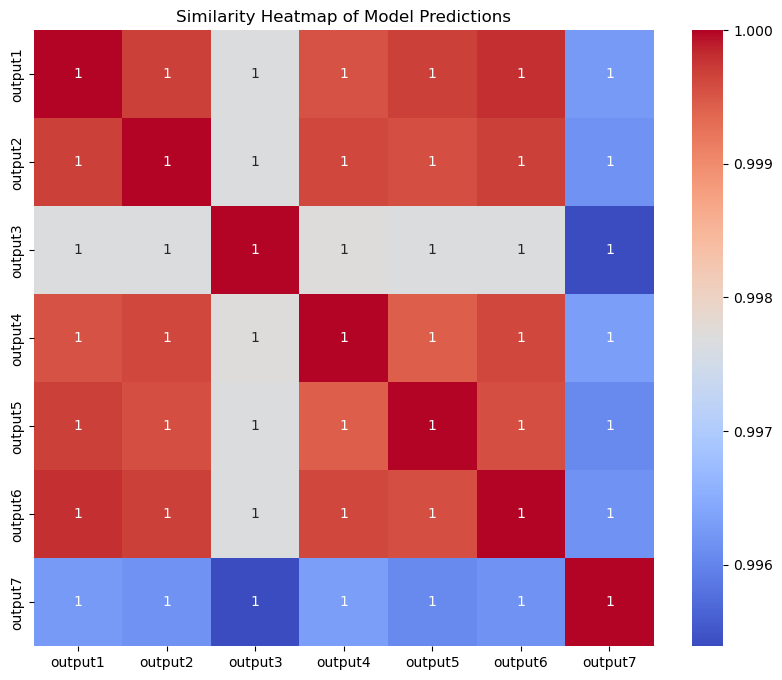

In [48]:
for i in range(num_models):
    for j in range(num_models):
        similarity_matrix[i, j] = jaccard_score(output_values[i], output_values[j])

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, cmap="coolwarm", xticklabels=[f"output{i+1}" for i in range(num_models)], 
            yticklabels=[f"output{i+1}" for i in range(num_models)])
plt.title("Similarity Heatmap of Model Predictions")
plt.show()

In [49]:
prob_predictions = []

# Train each model and store probability predictions
for params in model_configs:
    model = RandomForestClassifier(
        n_estimators=params["n_estimators"],
        max_depth=params["max_depth"],
        min_samples_split=params["min_samples_split"],
        min_samples_leaf=params["min_samples_leaf"],
        bootstrap=False,
        random_state=44,
        n_jobs=-1
    ) 

    model.fit(X_train_encoded, y_train)
    prob_pred = model.predict_proba(X_test_encoded)[:, 1]  # Probability for class 1
    prob_predictions.append(prob_pred)

# Convert list of predictions to a NumPy array and calculate the average probability for each test instance
prob_predictions = np.array(prob_predictions)
average_prob_predictions = prob_predictions.mean(axis=0)

# Threshold the averaged probabilities to obtain final binary predictions
final_predictions = (average_prob_predictions >= 0.5).astype(int)

# Save the final averaged predictions to CSV
output_df = pd.DataFrame({"ID": test_ID, "Overall_Experience": final_predictions})
output_df.to_csv("final_averaged_predictions.csv", index=False)

print("Final averaged predictions saved to 'final_averaged_predictions.csv'.")

Final averaged predictions saved to 'final_averaged_predictions.csv'.
